# Visualization

In [1]:
import importlib
import chatbot
importlib.reload(chatbot)
from chatbot import *

In [2]:
model_path = '/nfs/turbo/umms-indikar/shared/projects/RAG/models/llama-2-7b-chat.Q2_K.gguf' # llama-2-7b-chat.Q8_0.gguf'
persist_directory = "/nfs/turbo/umms-indikar/shared/projects/RAG/databases/Transcription-Factors-5-10-2024/"
llm, callback_manager = load_llama(model_path)
ragvectordb, embeddings_model = load_literature_db(persist_directory)

llama_model_loader: loaded meta data with 19 key-value pairs and 291 tensors from /nfs/turbo/umms-indikar/shared/projects/RAG/models/llama-2-7b-chat.Q2_K.gguf (version GGUF V2)
llama_model_loader: - tensor    0:                token_embd.weight q2_K     [  4096, 32000,     1,     1 ]
llama_model_loader: - tensor    1:           blk.0.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor    2:            blk.0.ffn_down.weight q3_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor    3:            blk.0.ffn_gate.weight q3_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor    4:              blk.0.ffn_up.weight q3_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor    5:            blk.0.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor    6:              blk.0.attn_k.weight q2_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor    7:         blk.0.attn_output.weight

Welcome to RAG! The chat log from this conversation will be saved to RAG2024-05-19-22:31:15.438230.json. How can I help?


/home/jpic/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
2024-05-19 22:31:15 INFO semantic_router.utils.logger local


Input >>  /force DATA load test_dataframe.csv


Sun May 19 22:31:17 2024 INFO DATA
Sun May 19 22:31:17 2024 INFO manipulateTable
Sun May 19 22:31:17 2024 INFO selectOperation


O1:
loading: test_dataframe.csv as Table 1


,Name,Age,Weight,Height,Is Student,Score,Grade,Department,Email Domain
0,Kelly Wilson,58.000000,73.084922,199.000000,True,68.000000,B,HR,gmail.com
1,Kelly Davenport,25.000000,52.514232,191.000000,True,52.000000,F,Finance,hotmail.com
2,James Faulkner,19.000000,68.955193,173.000000,True,49.000000,C,Marketing,yahoo.com


Sun May 19 22:31:17 2024 INFO Load pretrained SentenceTransformer: BAAI/bge-base-en-v1.5
/home/jpic/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Sun May 19 22:31:18 2024 INFO Use pytorch device_name: cpu
Sun May 19 22:31:25 2024 INFO Loading faiss with AVX512 support.
Sun May 19 22:31:25 2024 INFO Successfully loaded faiss with AVX512 support.


Input >>  /force DATA make a scatter plot of the Age relative to the Weight in this current table


Sun May 19 22:31:27 2024 INFO DATA
Sun May 19 22:31:27 2024 INFO manipulateTable
Sun May 19 22:31:27 2024 INFO selectOperation


O2:


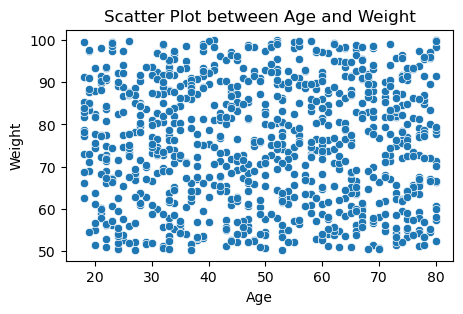

Visualization created.


Input >>  /force DATA make a bar plot


Sun May 19 22:31:42 2024 INFO DATA
Sun May 19 22:31:42 2024 INFO manipulateTable
Sun May 19 22:31:42 2024 INFO selectOperation


O3:
Visualization created.


Input >>  /force DATA make a bar plot of Grades


Sun May 19 22:32:06 2024 INFO DATA
Sun May 19 22:32:06 2024 INFO manipulateTable
Sun May 19 22:32:06 2024 INFO selectOperation


O4:


<Figure size 500x300 with 0 Axes>

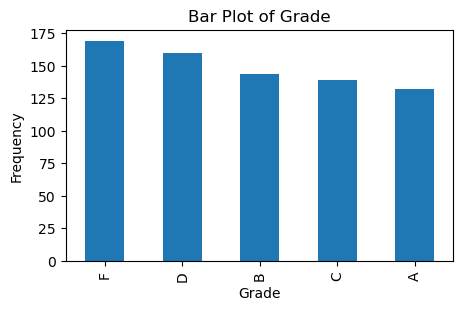

Visualization created.


Input >>  /force DATA make a bar plot of Grades horizontally


Sun May 19 22:32:18 2024 INFO DATA
Sun May 19 22:32:18 2024 INFO manipulateTable
Sun May 19 22:32:18 2024 INFO selectOperation


O5:


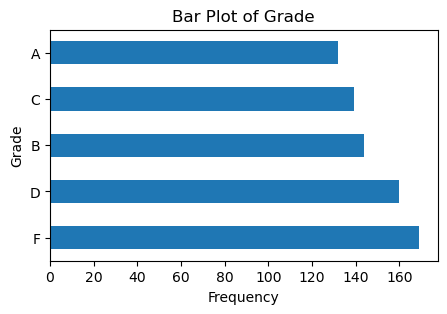

Visualization created.


Input >>  /force DATA make a line plot of age and weight


Sun May 19 22:33:02 2024 INFO DATA
Sun May 19 22:33:02 2024 INFO manipulateTable
Sun May 19 22:33:02 2024 INFO selectOperation


O6:


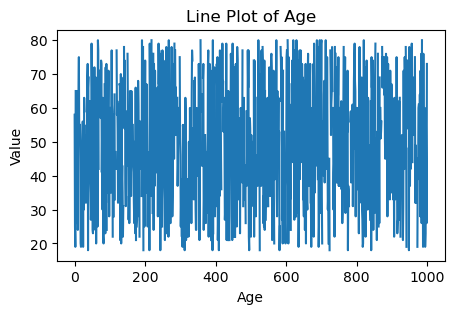

Visualization created.


Input >>  /force DATA make a line plot of weight


Sun May 19 22:33:19 2024 INFO DATA
Sun May 19 22:33:19 2024 INFO manipulateTable
Sun May 19 22:33:19 2024 INFO selectOperation


O7:


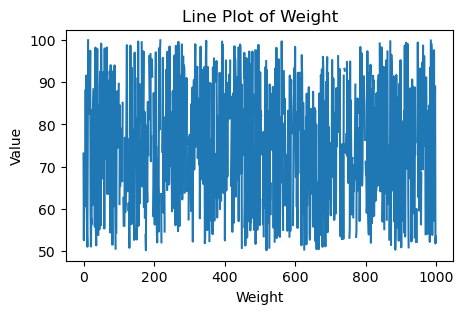

Visualization created.


Input >>  /force DATA make a histogram of the ages


Sun May 19 22:33:47 2024 INFO DATA
Sun May 19 22:33:47 2024 INFO manipulateTable
Sun May 19 22:33:47 2024 INFO selectOperation


O8:
the operation is not clear


Input >>  /force DATA make a histogram of weight


Sun May 19 22:34:29 2024 INFO DATA
Sun May 19 22:34:29 2024 INFO manipulateTable
Sun May 19 22:34:29 2024 INFO selectOperation


O9:
the operation is not clear


Input >>  /force DATA make a histogram plot of weight


Sun May 19 22:35:12 2024 INFO DATA
Sun May 19 22:35:12 2024 INFO manipulateTable
Sun May 19 22:35:12 2024 INFO selectOperation


O10:


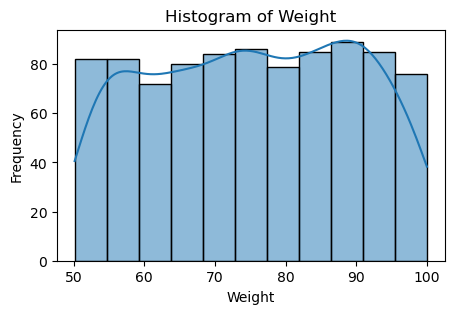

Visualization created.


Input >>  /force DATA make a histogram plot of age


Sun May 19 22:35:20 2024 INFO DATA
Sun May 19 22:35:20 2024 INFO manipulateTable
Sun May 19 22:35:20 2024 INFO selectOperation


O11:


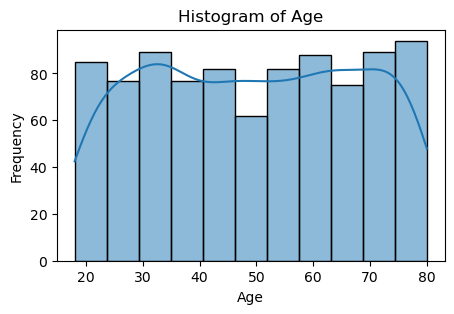

Visualization created.


Input >>  /force DATA make a box plot


Sun May 19 22:35:49 2024 INFO DATA
Sun May 19 22:35:49 2024 INFO manipulateTable
Sun May 19 22:35:49 2024 INFO selectOperation


O12:
Visualization created.


Input >>  /force DATA make a box plot of age and weight


Sun May 19 22:35:58 2024 INFO DATA
Sun May 19 22:35:58 2024 INFO manipulateTable
Sun May 19 22:35:58 2024 INFO selectOperation


O13:


<Figure size 500x300 with 0 Axes>

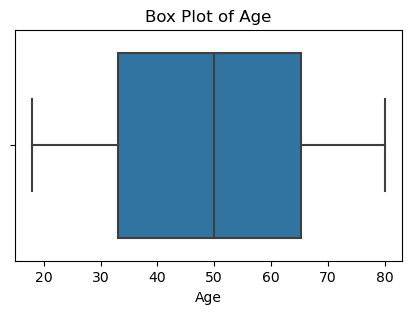

Visualization created.


Input >>  /force DATA make a box plot of weight


Sun May 19 22:36:09 2024 INFO DATA
Sun May 19 22:36:09 2024 INFO manipulateTable
Sun May 19 22:36:09 2024 INFO selectOperation


O14:


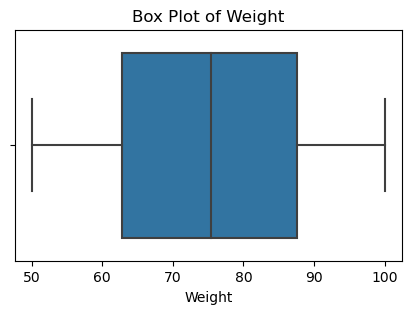

Visualization created.


Input >>  /force DATA make a violin of the ages


Sun May 19 22:36:36 2024 INFO DATA
Sun May 19 22:36:36 2024 INFO manipulateTable
Sun May 19 22:36:36 2024 INFO selectOperation


O15:
the operation is not clear


Input >>  /force DATA make a violin plot of the ages


Sun May 19 22:36:46 2024 INFO DATA
Sun May 19 22:36:46 2024 INFO manipulateTable
Sun May 19 22:36:46 2024 INFO selectOperation


O16:


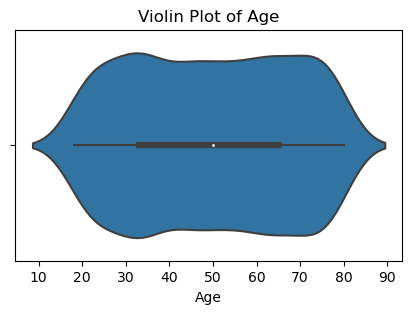

Visualization created.


Input >>  /force DATA make a pairs plot


Sun May 19 22:37:15 2024 INFO DATA
Sun May 19 22:37:15 2024 INFO manipulateTable
Sun May 19 22:37:15 2024 INFO selectOperation


O17:


/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


<Figure size 500x300 with 0 Axes>

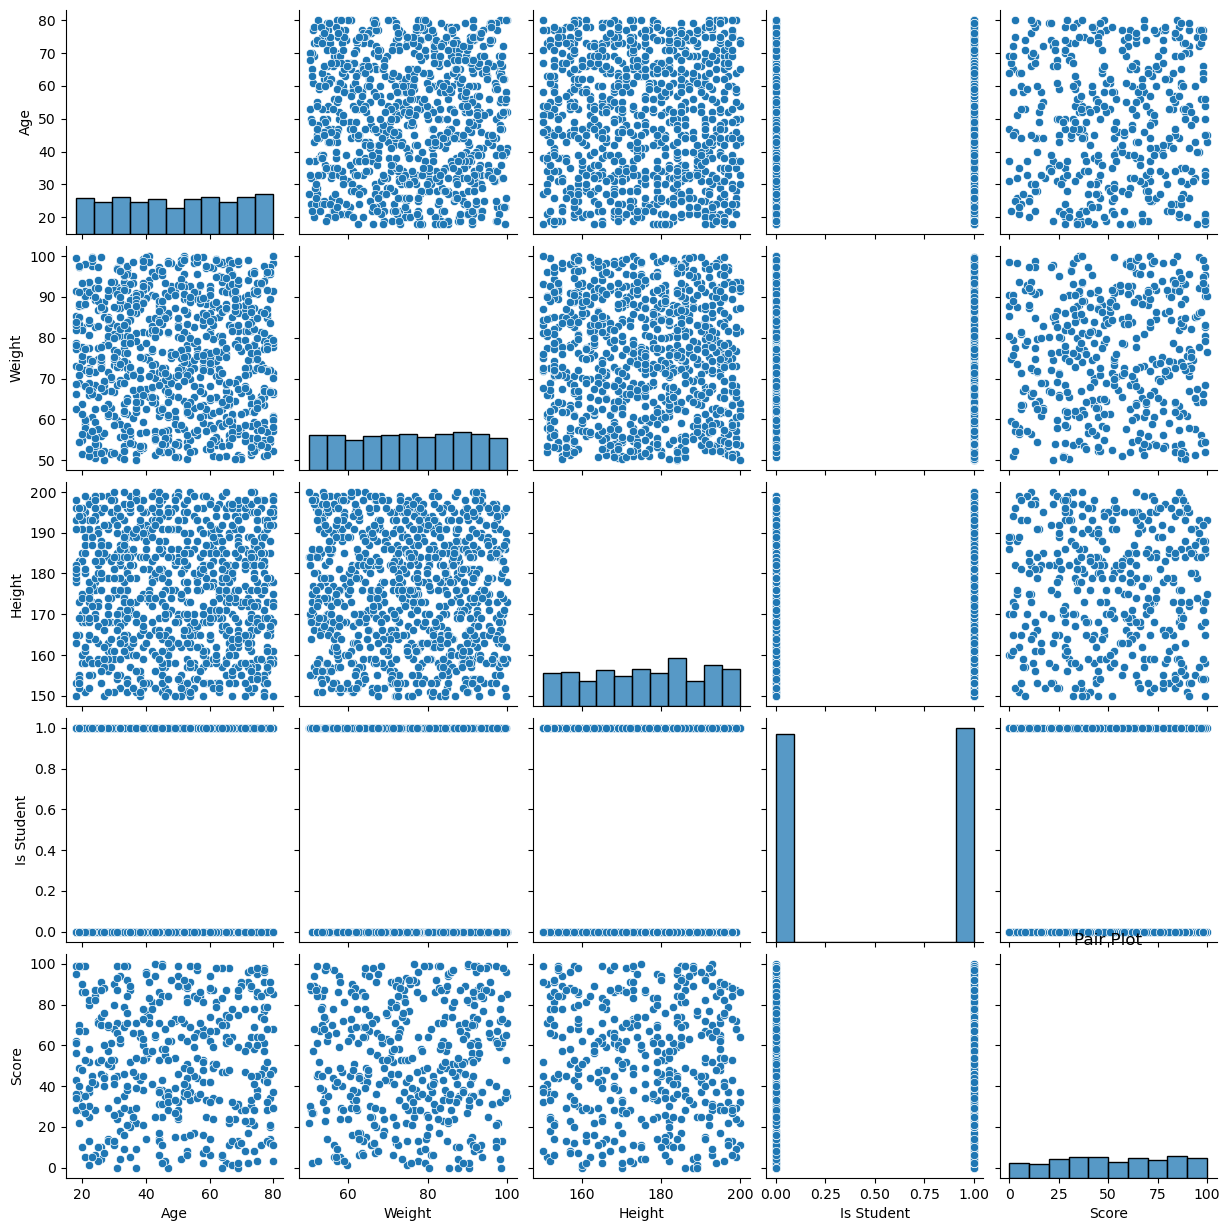

Visualization created.


Input >>  /force DATA make a heatmap plot


Sun May 19 22:37:37 2024 INFO DATA
Sun May 19 22:37:37 2024 INFO manipulateTable
Sun May 19 22:37:37 2024 INFO selectOperation


O18:


/home/jpic/RAG-DEV/tables.py:359: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), annot=True)


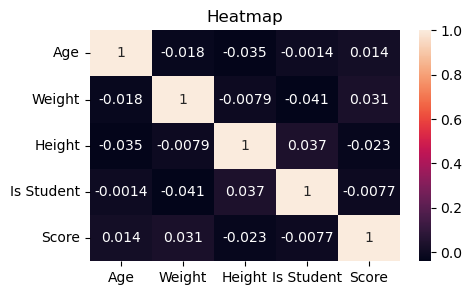

Visualization created.


Input >>  /force make a pie chart to visualize the score


Sun May 19 22:38:29 2024 INFO RAG


O19:


Llama.generate: prefix-match hit



I'm not able to create a pie chart to visualize the scores as I am just a language model and do not have access to external tools or databases. However, I can provide you with the information on how to create a pie chart in R using the ggplot2 package.
To create a pie chart in R, you will need to use the following code:
```
# Load the ggplot2 package
library(ggplot2)
# Create a data frame with the scores
scores <- c("Mathematics" = 80, "English" = 75, "Science" = 85, "History" = 70, "Economics" = 82)
# Create a pie chart
ggplot(scores, aes(x = factor(subject), y = score)) +
  geom_pie(fill = "blue") +
  theme_classic()
```
This will create a pie chart with the scores for each subject in blue. You can customize the chart further by adding additional layers or modifying the aesthetic mappings.
I hope this helps! Let me know if you have any other questions.


llama_print_timings:        load time =     439.56 ms
llama_print_timings:      sample time =     103.90 ms /   253 runs   (    0.41 ms per token,  2435.10 tokens per second)
llama_print_timings: prompt eval time =   25462.82 ms /   746 tokens (   34.13 ms per token,    29.30 tokens per second)
llama_print_timings:        eval time =   39007.44 ms /   252 runs   (  154.79 ms per token,     6.46 tokens per second)
llama_print_timings:       total time =   65508.81 ms


Input >>  /force DATA make a pie chart to visualize the score


Sun May 19 22:39:55 2024 INFO DATA
Sun May 19 22:39:55 2024 INFO manipulateTable
Sun May 19 22:39:55 2024 INFO selectOperation


O20:


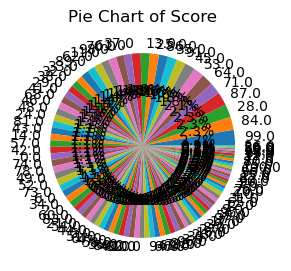

Visualization created.


Input >>  /force DATA make a pie chart to visualize the department


Sun May 19 22:40:11 2024 INFO DATA
Sun May 19 22:40:11 2024 INFO manipulateTable
Sun May 19 22:40:11 2024 INFO selectOperation


O21:


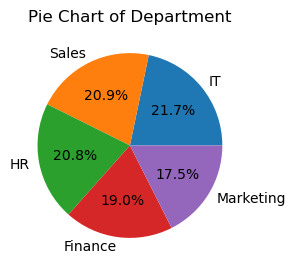

Visualization created.


In [3]:
import importlib
import chatbot
import tables
importlib.reload(chatbot)
importlib.reload(tables)
from chatbot import *
from tables import *

main(llm=llm, ragvectordb=ragvectordb, embeddings_model=embeddings_model)

In [16]:
X = ' '.join(['List', 'HERE']).lower()
X.split(' ')

['list', 'here']